In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')


In [46]:
dataset=pd.read_csv('../../data/BO1_forcast_customer_demand/forecast_customer_demand.csv')

In [47]:
station_service=pd.read_excel('../../data/data reference/codification clients_NUMCPT.xlsx',header=1)
station_service


,SERVICE,NUMCPT,STATION,GOUVERNORAT,Unnamed: 4
0,RESEAU,150720,ARIANA,ARIANA,
1,RESEAU,152510,MNIHLA,ARIANA,
2,RESEAU,153360,Rte de RAOUED,ARIANA,
3,RESEAU,153650,C.B.Ammar,ARIANA,
4,RESEAU,153990,ENNASR ARIANA,ARIANA,
...,...,...,...,...,...
255,RESEAU,153680,EL FAHS,ZAGHOUAN,NaN
256,RESEAU,153690,BIR MCHERGA,ZAGHOUAN,NaN
257,RESEAU,153780,H.ZRIBA,ZAGHOUAN,NaN
258,RESEAU,154360,ENNADHOUR,ZAGHOUAN,NaN


# 1-Data Understanding

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21775 entries, 0 to 21774
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NOMDPO       21775 non-null  object 
 1   LIBPRD       21775 non-null  object 
 2   NUMCPT       21775 non-null  object 
 3   MOIS         21775 non-null  object 
 4   CODGVR       21775 non-null  object 
 5   CODLOC       21775 non-null  object 
 6   SUM(MNTHT)   21775 non-null  float64
 7   SUM(QTEPRD)  21775 non-null  float64
 8   prixHT       21764 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.5+ MB


<b>NOMDPO</b>: name of agil depot  <br>
<b>LIBPRD</b>: type of product that will be delivered <br>
<b>NUMCPT</b>:  name of the gas station <br>
<b>MONTH</b>: delivery date<br>
<b>CODGVR</b>: governorate of gas station<br>
<b>CODLOC</b>: region of gas station<br>
<b>SUM(MNTHT)</b>: total amount to be paid excluding tax<br>
<b>SUM(QTEPRD)</b>: total quantity delivered<br>
<b>prixHT</b>: unit price<br>

### remove null values


In [49]:
dataset.isnull().values.any()


True

-> data has null values

In [50]:
lignes_manquantes = dataset[dataset.isnull().any(axis=1)]
lignes_manquantes

,NOMDPO,LIBPRD,NUMCPT,MOIS,CODGVR,CODLOC,SUM(MNTHT),SUM(QTEPRD),prixHT
5552,SKHIRA,SSP SUPER SANS PLOMB,KSOUR ESSEF,18-Feb,MAHDIA,KSOUR ESSAF,0.0,0.0,NaN
5892,SKHIRA,GASOIL 50,REMADA,18-Dec,TATAOUINE,REMADA,0.0,0.0,NaN
9531,SKHIRA,GAZOIL SANS SOUFRE,BOUJARBOU,19-Oct,SFAX,BOUJARBOU,0.0,0.0,NaN
9943,SKHIRA,SSP SUPER SANS PLOMB,AV REPUBLIQUE,18-Apr,TUNIS,TUNIS VILLE,0.0,0.0,NaN
10546,SKHIRA,GAZOIL SANS SOUFRE,S. LAHED .S,19-May,SOUSSE,SOUSSE,0.0,0.0,NaN
10613,BIZERTE CARBURANT,GAZOIL SANS SOUFRE,BIR MCHERGA,19-May,ZAGHOUAN,BIR MCHERGUA,0.0,0.0,NaN
14789,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,TOZOGHRANE,19-Jun,NABEUL,TOZGRANE,0.0,0.0,NaN
14811,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,BIR MCHERGA,19-Mar,ZAGHOUAN,BIR MCHERGUA,0.0,0.0,NaN
16137,SKHIRA,GASOIL,JEBENIANA,19-Jun,SFAX,JBENIANA,0.0,0.0,NaN
18931,SKHIRA,GASOIL,EL ALA,19-Aug,KAIROUAN,EL ALA,0.0,0.0,NaN


In [51]:
dataset = dataset.dropna()


### Remove duplicates


In [52]:
dataset=dataset.drop_duplicates()
print("Shape of dataset after removing duplicates:",dataset.shape)

Shape of dataset after removing duplicates: (21758, 9)


### Outliers

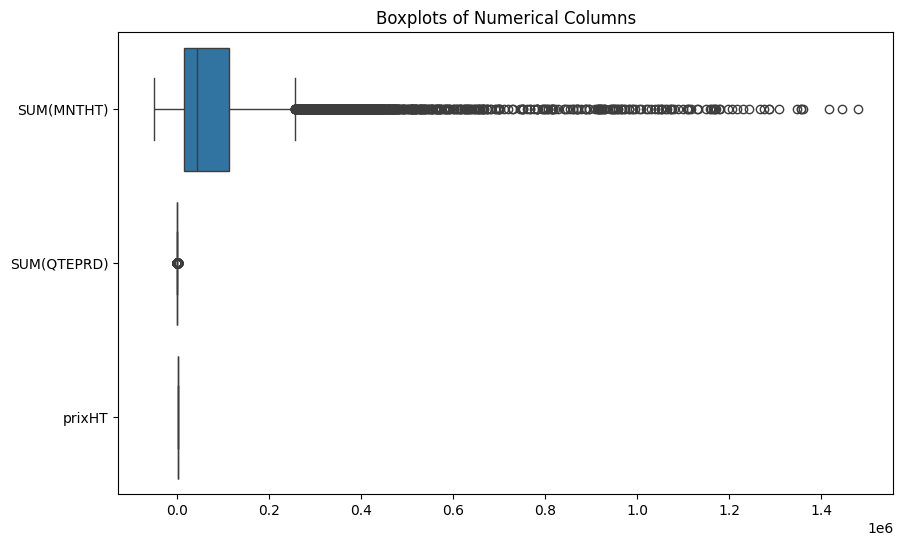

In [53]:
import seaborn as sns

# Select numerical columns
numerical_columns = dataset.select_dtypes(include=['float64']).columns

# Create a boxplot for all numerical columns on the same graph
plt.figure(figsize=(10, 6))  # Adjust size if needed
sns.boxplot(data=dataset[numerical_columns], orient='h')
plt.title('Boxplots of Numerical Columns')
plt.show()

## <i>Interpretation</i>

This outliers can represent rare but important cases so we cannot remove them until further analysis and viz

### Data vizualisation

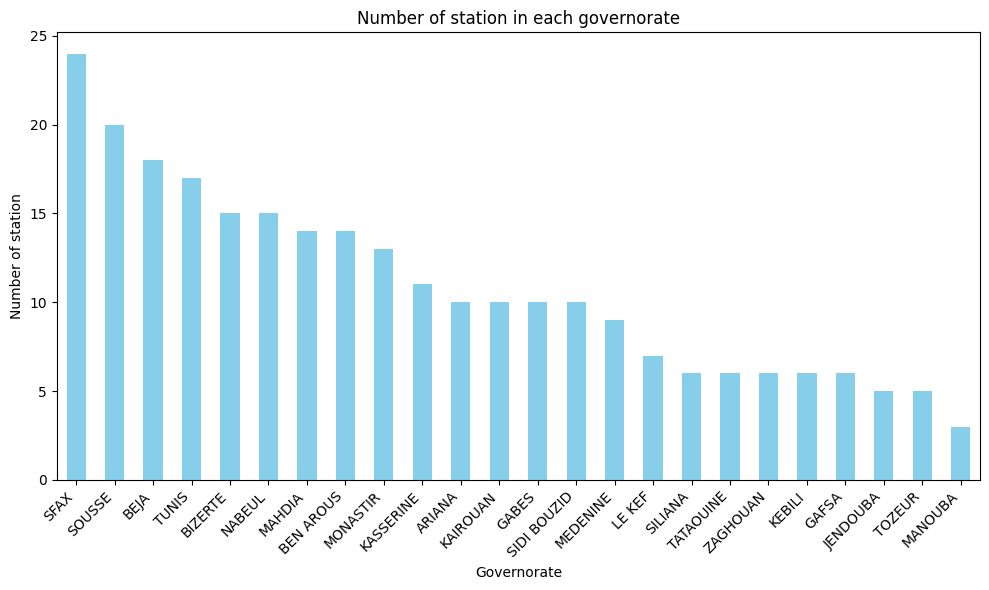

In [54]:
nbr_station=station_service['GOUVERNORAT'].value_counts()
# Tracer le graphique
plt.figure(figsize=(10, 6))
nbr_station.plot(kind='bar', color='skyblue')
plt.title('Number of station in each governorate')
plt.xlabel('Governorate')
plt.ylabel('Number of station')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

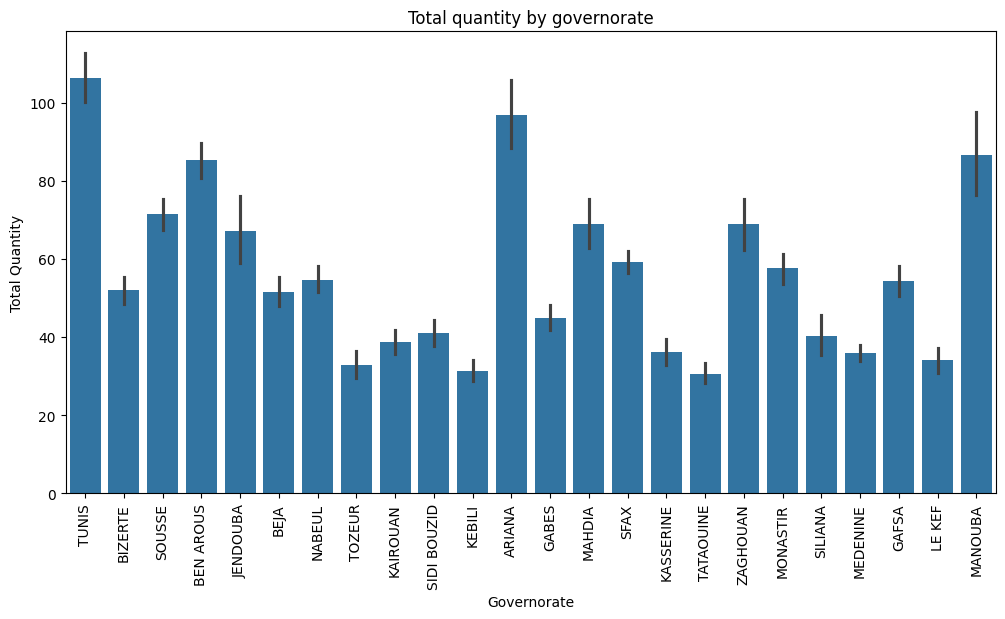

In [55]:
# Visualisation par gouvernorat
plt.figure(figsize=(12, 6))
sns.barplot(x='CODGVR', y='SUM(QTEPRD)', data=dataset)
plt.title('Total quantity by governorate')
plt.xlabel('Governorate')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)
plt.show()

## <i>Interpretation</i>

 Tunis consumes more fuel than other governorate and this reflects : <br>
-the high density population for tunisia's capital <br>
-the high economic activity 


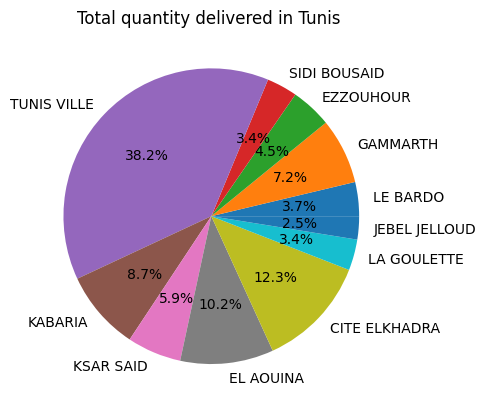

In [56]:
df_tunis = dataset[dataset["CODGVR"] == "TUNIS"]

quantites_par_region = {}

for region in df_tunis["CODLOC"].unique():
    df_region = df_tunis[df_tunis["CODLOC"] == region]

    quantite_totale = df_region["SUM(QTEPRD)"].sum()

    quantites_par_region[region] = quantite_totale

plt.pie(quantites_par_region.values(), labels=quantites_par_region.keys(), autopct="%1.1f%%")

plt.title("Total quantity delivered in Tunis ")

# Afficher le graphique
plt.show()

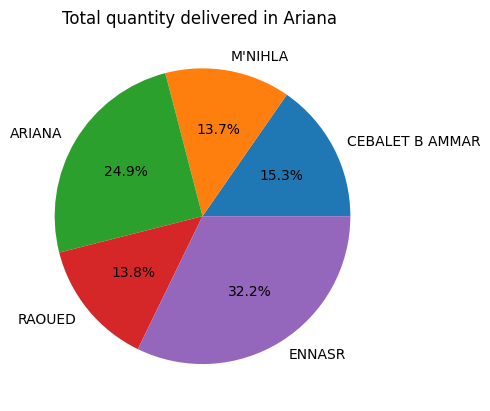

In [57]:
df_tunis = dataset[dataset["CODGVR"] == "ARIANA"]

quantites_par_region = {}

for region in df_tunis["CODLOC"].unique():
    df_region = df_tunis[df_tunis["CODLOC"] == region]

    quantite_totale = df_region["SUM(QTEPRD)"].sum()

    quantites_par_region[region] = quantite_totale

plt.pie(quantites_par_region.values(), labels=quantites_par_region.keys(), autopct="%1.1f%%")

plt.title("Total quantity delivered in Ariana ")

# Afficher le graphique
plt.show()

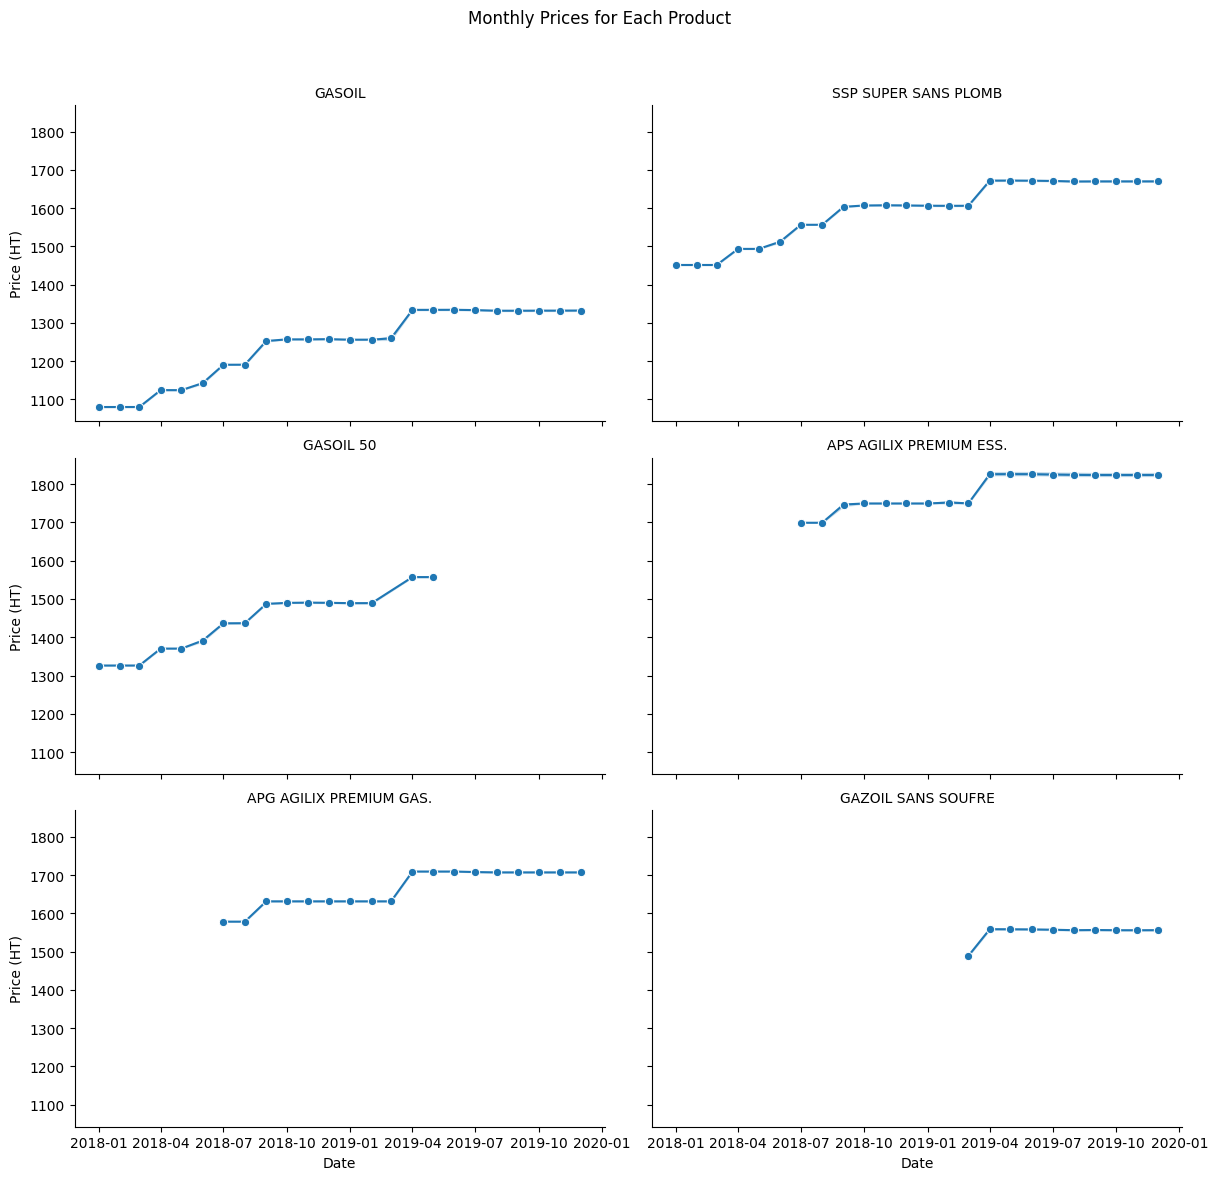

In [42]:

# Assurez-vous que la colonne MOIS est au format datetime
dataset['MOIS'] = pd.to_datetime(dataset['MOIS'], format='%y-%b')

# Tracer le graphique avec seaborn
g = sns.FacetGrid(dataset, col="LIBPRD", col_wrap=2, height=4, aspect=1.5)
g.map(sns.lineplot, "MOIS", "prixHT", marker='o')
g.set_axis_labels("Date", "Price (HT)")
g.set_titles("{col_name}")
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly Prices for Each Product')
plt.show()

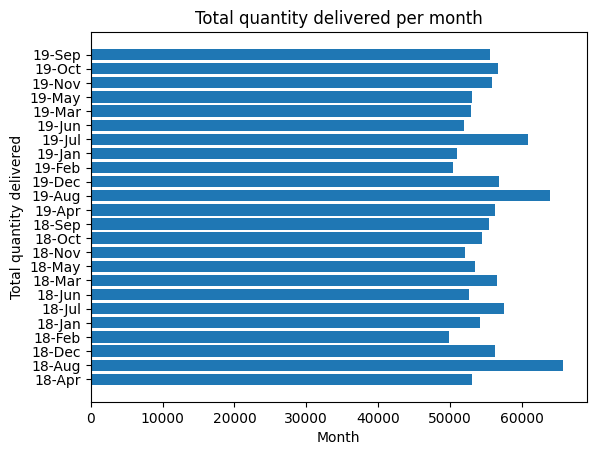

In [59]:
import matplotlib.pyplot as plt

df_somme_mensuelle = dataset.groupby(["MOIS"])["SUM(QTEPRD)"].sum()

plt.barh(df_somme_mensuelle.index, df_somme_mensuelle)
plt.xlabel("Month")
plt.ylabel("Total quantity delivered")
plt.title("Total quantity delivered per month")
plt.show()

## <i>Interpretation</i>
-There is a notable variation in the quantity of fuel delivered each month and especially for <b>Aug-18 </b>After refering to the 'monthly prices for each product' graph, we can interpret that this spike is  relevant <b>to the increase of fuel price in sept-18</b>
<br>
-There could be times of year when fuel demand increases, perhaps due to holidays or weather changes and this happened especially during summer vacation (July-19,Aug-19,Aug-18)



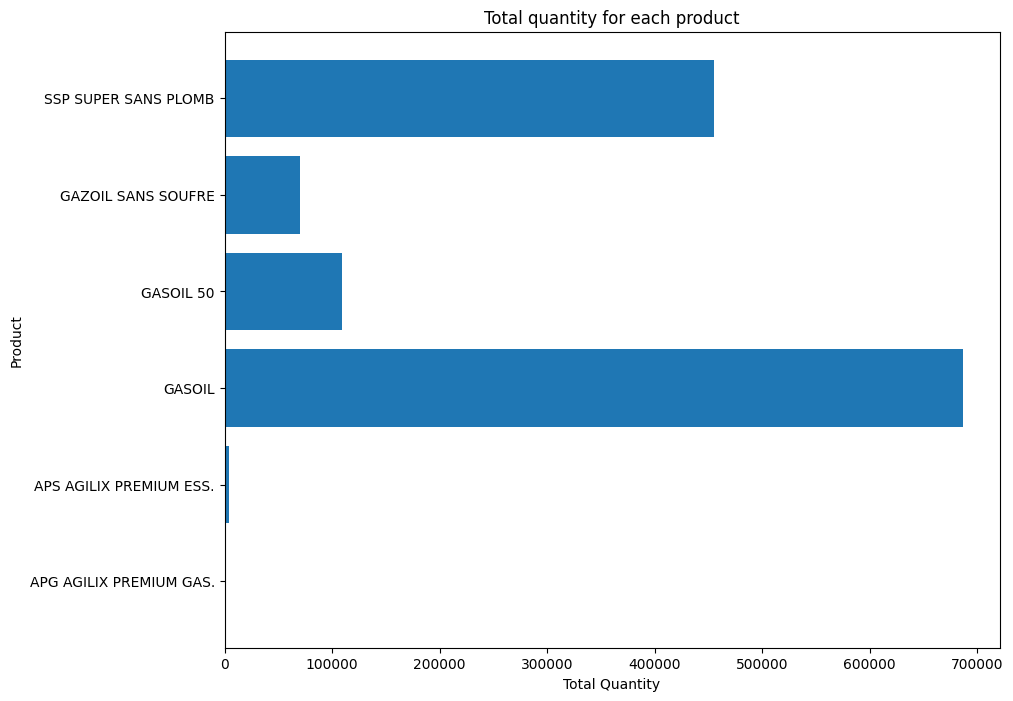

In [44]:
import matplotlib.pyplot as plt

# Calculer la quantité totale de carburant livré pour chaque produit
df_somme_produit = dataset.groupby(["LIBPRD"])["SUM(QTEPRD)"].sum()
# Créer un bar plot pour chaque produit

plt.figure(figsize=(10, 8))
plt.barh(df_somme_produit.index, df_somme_produit)
plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.title('Total quantity for each product')
plt.show()